# Optimizers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch.utils.data import dataset ,dataloader
from termcolor import colored
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import colors as mcolors

from IPython.display import HTML

device = ("cuda" if torch.cuda.is_available() else "cpu")
SEED=1
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Optimization

In a nutshell, optimization is a minimization problem.But the question is what do we need to minimize in our Model Training.

In a Learning problem we have a **Loss-Function** or a **Target function** which is a mathematical way of measuring how wrong our predictions are.During the training process, we tweak and change the parameters (weights) of our model to try and minimize that loss function, and make our predictions as correct as possibl.So we need a way that tells us **How do we change the parameters of our model, by how much, and when?** and that way is by using **Optimizers**
<br>
<br>
**Optimizers**<br>
In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction

<br>
Let us understand this through an example:
<br>
An objective function f(x) may have a local minimum x, where f(x) is smaller at x than at the neighboring points of x. If f(x) is the smallest value that can be obtained in the entire domain of x, f(x) is a global mininum. The following figure demonstrates examples of local and global minima for the function:
<br>
$$ f(x) = x\cdot sin(-\pi x),−1.0 \leq x \leq 3.0.$$

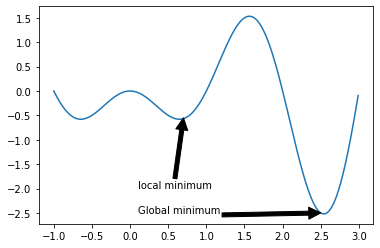

In [2]:
def f(x):
    return x * np.sin(-np.pi*x)

a = np.arange(-1,3,0.01)
plt.annotate('local minimum', xy=(0.7, -0.55), xytext=(0.1, -2.0),
            arrowprops=dict(facecolor='black'))

plt.annotate('Global minimum', xy=(2.5, -2.5), xytext=(0.1, -2.5),
            arrowprops=dict(facecolor='black'))

plt.plot(a,f(a));

Here from graph it is clear that using some optimization technique for a curve f(x) we need to find either one of the following:
    1.  An optimal Local minima
    2.  Global minima (Highly unlikely and difficult to find)
When an optimal minima is found at that point the loss function gives the least value meaning the machine learning model is converged

# Saddle Point
Saddle point is problem for an optimizer because this point is neither local minima nor local maxima.
If the figure shown below is cut through a constant x axis plane you will get a local maxima
and if it's cut through a constant y axis plane you will get a local minima


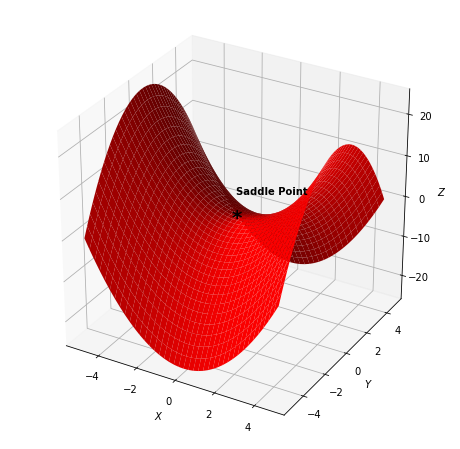

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2

ax.text2D(0,0,'*',fontdict={'ha': 'center', 'va': 'center', 'family': 'sans-serif','fontweight': 'bold',"fontsize":20})
ax.text2D(0,0.01,'Saddle Point',fontdict={'family': 'sans-serif','fontweight': 'bold'})
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel(r'$Z$')
ax.plot_surface(X, Y, Z,color="red");

We can perform 2 types of optimization 
    1. First Order Optimization
    2. Second order Optimization
    
The approach we are going to take is named as **Gradient Descent** which is first order optimization technique, i.e we only use first derivative to calculate local minima

# Gradient Descent

Any discussion about optimizers needs to begin with the most popular one, and it’s called Gradient Descent. This algorithm is used across all types of Machine Learning (and other math problems) to optimize. It’s fast, robust, and flexible. 
<br>
<br>
**Here’s how it works mthematically(back to Calculus I again!):**

Consider a loss function f(x) that takes any multi-dimensional vector 
$$
x=[x1,x2,…,xd]^\top
$$
as its input. The gradient of f(x) with respect to x is defined by the vector of partial derivatives:
<br>
$$
\bigtriangledown f(x)=[\frac{\partial f(x)}{\partial x1},\frac{\partial f(x)}{\partial x2} , .... \frac{\partial f(x)}{\partial xd}]^\top.
$$

In simple terms,**Gradients** are partial derivatives, and are a measure of change.So in each element of $$ \frac{\partial f(x)}{\partial x1} $$ of the gradient indicates the rate of change for f at the point x with respect to the input x1 only. To measure the rate of change of f in any direction that is represented by a unit vector u, in multivariate calculus, we define the directional derivative of f at x in the direction of u as
\begin{align}
D_uf(x)=\lim h\to 0  \frac{f(x+hu)- f(x)}{h},
\end{align}
which can be rewritten according to the chain rule as
\begin{align}
D_uf(x)=\bigtriangledown f(x)\cdot u.
\end{align}

Since Duf(x)
gives the rates of change of f at the point x in all possible directions, to minimize f, we are interested in finding the direction where f can be reduced fastest. Thus, we can minimize the directional derivative Duf(x) with respect to u. Since Duf(x)=∥∇f(x)∥⋅∥u∥⋅cos(θ)=∥∇f(x)∥⋅cos(θ), where θ is the angle between ∇f(x) and u, the minimum value of cos(θ) is -1 when θ=π. Therefore, Duf(x) is minimized when u is at the opposite direction of the gradient ∇f(x). Now we can iteratively reduce the value of f

with the following gradient descent update:
        \begin{align}
        x=x− \eta \bigtriangledown f(x),
\end{align}

where the positive scalar η
is called the learning rate or step size (discussed next).

***If that is too much to sink in,let us try explaining it in simple english***
1. Calculate what a small change in each individual weight would do to the loss function (i.e. which direction we should move in)
2. Adjust each individual weight based on its gradient (i.e. take a small step(determined by learning rate) in the determined direction)
3. Keep doing steps #1 and #2 until the loss function gets as low as possible

# The Learning Rate

Changing our weights too fast by adding or subtracting too much (i.e. taking steps that are too large) can hinder our ability to minimize the loss function. We don’t want to make a jump so large that we skip over the optimal value for a given weight.

To make sure that this doesn’t happen, we use a variable called “the learning rate.” This thing is just a very small number, usually something like 0.001, that we multiply the gradients by to scale them. This ensures that any changes we make to our weights are pretty small. In math talk, taking steps that are too large can mean that the algorithm will never converge to an optimum.

At the same time, we don’t want to take steps that are too small, because then we might never end up with the right values for our weights. In math talk, steps that are too small might lead to our optimizer converging on a local minimum for the loss function, but not the absolute minimum.

For a **simple summary**, just remember that the learning rate ensures that we change our weights at the right pace, not making any changes that are too big or too small.

![](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fqph.fs.quoracdn.net%2Fmain-qimg-ed4a3867ca90b95b33b95f1b89d8335c-c&f=1)

# Gradient Descent Algorithm-Pseducode

```python
for i in range(num_epochs):
    grad = calculate_gradient(entire_data,param)
    param = param-learning_rate*grad
```

![](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*iU1QCnSTKrDjIPjSAENLuQ.png&f=1)

# Stochastic Mini-Batch Gradient Descent

The problem with gradient descent is, it loads the entire data at once and then perform the gradient update so there is a memorey constraint. To solve this problem we use something called stochastic gradient descent.

In this technique we divide the entire data into mini batches and then calculate the gradient based on that batch and update the params according to that batch
```python
for i in range(num_epochs):
    np.random.shuffle(data)
    for each_batch in random_sample_batch(data=entire_training_data,batch_size=32):
        grad = calculate_gradient(entire_batch,param)
        param = param-learning_rate*grad
```
1.Shuffle the training data set to avoid pre-existing order of examples.

2.Partition the training data set into b mini-batches based on the batch size. If the training set size is not divisible by batch size, the remaining will be its own batch.

3.The batch size is something we can tune. It is usually chosen as power of 2 such as 32, 64, 128, 256, 512, etc. The reason behind it is because some hardware such as GPUs achieve better run time with common batch sizes such as power of 
2

This technique is efficient and computationally tractable.

Other than SGD there are many more different optimization alogrithms which provide an efficient and faster convergence method by updating the weights and biases.Some of them are lsited below:
<br>
1. Nestrov Acclerated Gradient
2. Adagrad
3. Adadelta
4. RMSprop
5. Adam
6. AdaMax
7. Nadam
8. AMSGrad

![](https://cdn-images-1.medium.com/max/1600/1*SjtKOauOXFVjWRR7iCtHiA.gif)

# Implementing Optimizers

In [4]:
class Animation:
    def __init__(self,*vectorFunc):
        self.vectorFunc = vectorFunc
        self.fig = plt.figure(figsize=(12,8))
        self.ax = plt.axes(projection='3d')
        self.ax.set_title('Surface of $f(x,y) = x^{2} + y^{2}$')
        self.ax.set_xlabel('$x$')
        self.ax.set_ylabel('$y$')
        self.ax.set_zlabel('$f(x,y)$')
        self.colors = mcolors.TABLEAU_COLORS.values()
    
    def init(self):
            l = []        
            for i in range(len(self.vectorFunc)):
                start = getattr(self,f"start_{i}")[0]
                start.set_data([],[])
                start.set_3d_properties([])
                path = getattr(self,f"path_{i}")[0]
                path.set_data([],[])
                path.set_3d_properties([])
                dot = getattr(self,f"dot_{i}")[0]
                dot.set_data([],[])
                dot.set_3d_properties([])
                l.extend([start,path,dot])
            self.ax.legend(l[1::3] ,[x.__name__ for x in self.vectorFunc])
            return tuple(l)

    
    def animate(self,i):
        l = []        
        for j , vector in enumerate(self.vectors):
            start = getattr(self,f"start_{j}")[0]
            start.set_data([vector[0,0]],[vector[1,0]])
            start.set_3d_properties([self.f(vector[0,0] , vector[1,0])])
            path = getattr(self,f"path_{j}")[0]
            path.set_data(vector[0:i,0],vector[0:i,1])
            path.set_3d_properties(self.f(vector[0:i , 0],vector[0:i,1]))
            dot = getattr(self,f"dot_{j}")[0]
            dot.set_data([vector[i,0]],[vector[i,1]])
            dot.set_3d_properties([self.f(vector[i,0],vector[i,1])])
            l.extend([start,path,dot])
        return tuple(l)
    
    def __call__(self,vector):

        self.f = lambda x,y :(x**2 + y**2 )

        xlist = np.arange(-5, 5, 0.25)
        ylist = np.arange(-5, 5, 0.25)
        X,Y = np.meshgrid(xlist, ylist)        # Create 2-D grid xlist,ylist values
        Z = self.f(X,Y)             # Compute function values on the grid

        self.ax.plot_surface(X,Y,Z,cmap='viridis',alpha=0.15)
        self.ax.scatter([0],[0],[0],color="k" , marker="X")

        for i ,color in zip(range(len(self.vectorFunc)),self.colors):
            setattr(self,f"start_{i}",  self.ax.plot([],[],[],'r*',markersize=10))
            setattr(self,f"path_{i}",  self.ax.plot([],[],[],linewidth=2,color=color))
            setattr(self,f"dot_{i}",  self.ax.plot([],[],'o',color=color))
        
        self.vectors = [func(vector.clone().detach().requires_grad_(True)) for func in self.vectorFunc]
        anim = animation.FuncAnimation(self.fig,self.animate,frames=len(self.vectors[0]),init_func=self.init)
        return anim.to_html5_video()

In [5]:
EPOCHS = 50 
LR = 1e-3
VECTOR =  torch.tensor([5.5,4.5])
CRITERION = torch.zeros_like(VECTOR)
LOSS_FUNC = lambda x : torch.pow((x-CRITERION),2).sum()


## SGD

$$
data = data - lr* grad
$$

In [6]:
def SGD(vector):
    vectors = [vector.squeeze(0).tolist()]
    for i in range(EPOCHS):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():
            vector.data = vector.data - LR *  vector.grad
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    return np.array(vectors)

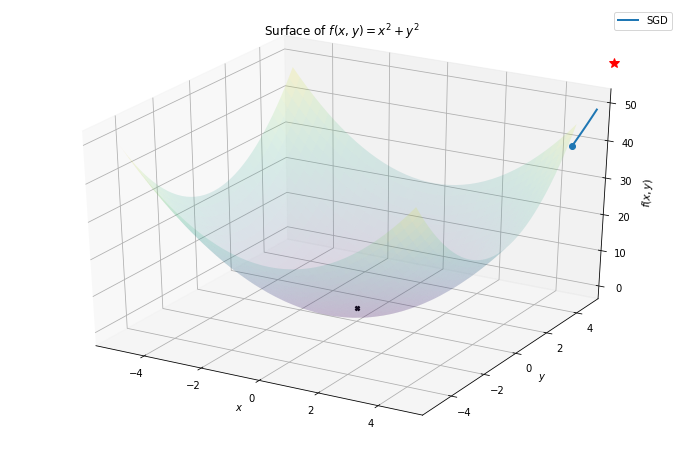

In [7]:
anim = Animation(SGD)(VECTOR)
HTML(anim)

## SGD with Momentum

The real momentum update looks like

$$
velocity = viscosity * velocity - lr* grad \\
data = data - velocity
$$

But In pytorch they do the other way

$$
velocity = viscosity * velocity + grad \\
data = data - lr * velocity
$$


In [8]:
def SGD_Momentum(vector):
    viscosity = 0.9
    velocity = torch.zeros_like(vector)
    vectors = [vector.squeeze(0).tolist()]

    for i in range(EPOCHS):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():
            velocity = viscosity * velocity + vector.grad
            vector.data = vector.data - LR *  velocity
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    return np.array(vectors)

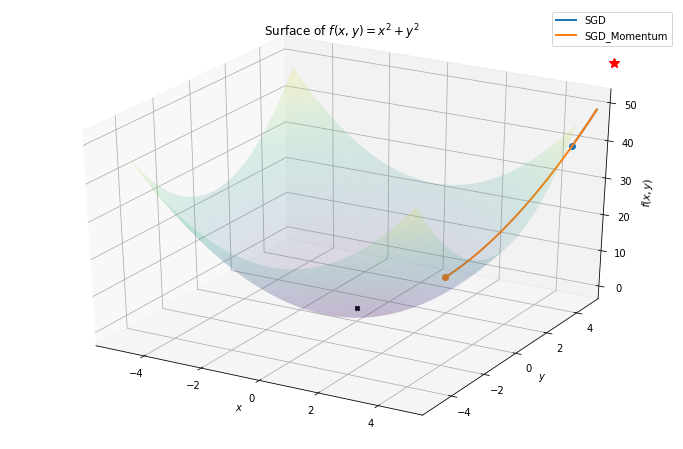

In [9]:
anim = Animation(SGD,SGD_Momentum)(VECTOR)
HTML(anim)

## SGD with Nestrov Momentum
![](images/nesterov.jpeg)

 Nesterov momentum. Instead of evaluating gradient at the current position (red circle), we know that our momentum is about to carry us to the tip of the green arrow. With Nesterov momentum we therefore instead evaluate the gradient at this "looked-ahead" position. 

## AdaGrad

$$
cache = cache + (grad^2) \\
data = data - \frac {(lr * grad)}{( \sqrt {cache} + eps)}
$$

It is a adaptive learning method where we are constantly annealing the lr.

The eps is a extremely small value to smoothen the denominator.

In [10]:

def adaGrad(vector):
    lr=0.5
    cache = torch.zeros_like(vector)
    vectors = [vector.squeeze(0).tolist()]
    eps = 1e-10 # can be any small value

    for i in range(EPOCHS):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():

            cache +=  (vector.grad ** 2)  
            vector.data = vector.data - (lr *  vector.grad / (torch.sqrt(cache) + eps)) 
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    
    return np.array(vectors)

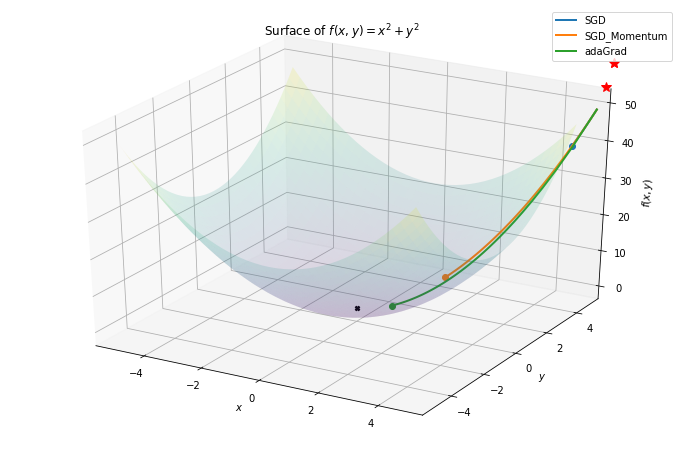

In [11]:
anim = Animation(SGD,SGD_Momentum,adaGrad)(VECTOR)
HTML(anim)

## RMSProp 
It solved AdaGrad problem of deminishing gradient.
 $$
 cache = alpha *cache + (1-alpha) * grad^2 \\
 data = data - \frac {(lr * grad)} {(\sqrt{cache} + eps)}
 $$

In [12]:
def RMSprop(vector):
    lr=0.5
    alpha=0.99
    cache = torch.zeros_like(vector)
    vectors = [vector.squeeze(0).tolist()]
    eps = 1e-10 # can be any small value

    for i in range(EPOCHS):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():

            cache = alpha * cache + ((1-alpha) * (vector.grad ** 2))  
            vector.data = vector.data - (lr *  vector.grad / (torch.sqrt(cache) + eps)) 
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    return np.array(vectors)

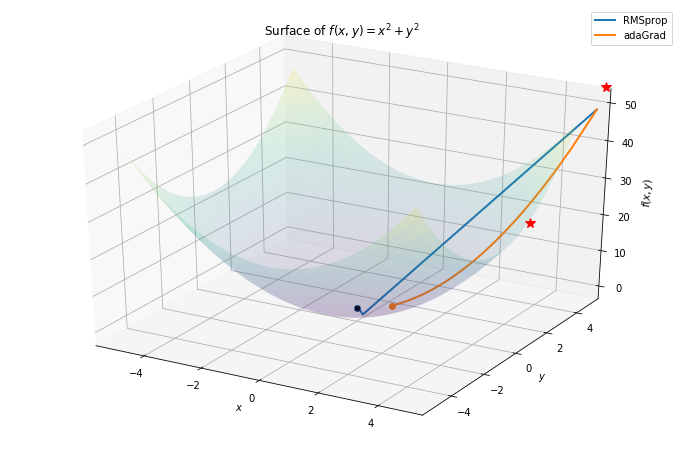

In [13]:
anim = Animation(RMSprop,adaGrad)(VECTOR)
HTML(anim)

## AdaDelta
It is all similar to RMSProp with an additional delta attribute which just eliminates the use of  lr away from the update parameter.

The authors note that the units in this update (as well as in SGD, Momentum, or Adagrad) do not match, i.e. the update should have the same hypothetical units as the parameter. To realize this, they first define another exponentially decaying average, this time not of squared gradients but of squared parameter updates:

 $$
 cache = alpha *cache + (1-alpha) * grad^2 \\
 delta = \frac {\sqrt {acc\_delta + eps}*grad}{\sqrt{cache+eps}}\\
 data = data - delta\\
 acc\_delta = alpha * acc\_delta + (1-alpha) * delta^2 \\
 $$


In [14]:
def AdaDelta(vector):
    rho = 0.9
    lr=1.0
    cache = torch.zeros_like(vector)
    acc_delta = torch.zeros_like(vector)
    vectors = [vector.squeeze(0).tolist()]
    eps = 1e-6 # can be any small value

    for i in range(EPOCHS):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():
            cache = rho * cache + ((1-rho) * (vector.grad ** 2))  
            delta = torch.sqrt(acc_delta+eps) *vector.grad / torch.sqrt(cache+eps)
            vector.data = vector.data - lr * delta
            acc_delta = acc_delta * rho + ((1-rho) * (delta**2))
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    return np.array(vectors)

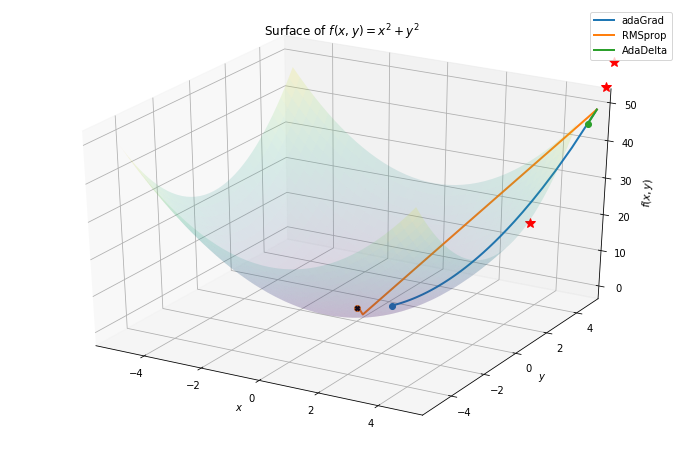

In [15]:
anim = Animation(adaGrad,RMSprop,AdaDelta)(VECTOR)
HTML(anim)

## Adam
It is basically RMSProp with Momentum

$$
m = beta1*m + (1-beta1)*dx \\
mt = \frac{m} {(1-beta1^t)} \\
v = beta2*v + (1-beta2)* dx^2 \\
vt = \frac{v} {(1-beta2^t)} \\
x = x - \frac{lr * mt}{np.sqrt(vt) + eps}
$$

Notice that the update looks exactly as RMSProp update, except the “smooth” version of the gradient m is used instead of the raw (and perhaps noisy) gradient vector dx. Recommended values in the paper are eps = 1e-8, beta1 = 0.9, beta2 = 0.999. In practice Adam is currently recommended as the default algorithm to use, and often works slightly better than RMSProp. However, it is often also worth trying SGD+Nesterov Momentum as an alternative. The full Adam update also includes a bias correction mechanism, which compensates for the fact that in the first few time steps the vectors m,v are both initialized and therefore biased at zero, before they fully “warm up”. With the bias correction mechanism, the update looks as follows:

In [16]:
import math
def Adam(vector):
    m = torch.zeros_like(vector)
    v = torch.zeros_like(vector)
    beta1 = 0.9
    beta2 = 0.99
    eps = 1e-8
    lr=0.2
    vectors = [vector.squeeze(0).tolist()]
    for i in range(1 , EPOCHS+1):
        z = LOSS_FUNC(vector)
        z.backward()
        with torch.no_grad():
            m = m * beta1 + (1-beta1)*vector.grad
            v = v * beta2 + (1-beta2)*(vector.grad**2)
            denom = torch.sqrt(v)+eps
            bias_correction_m = 1 - beta1**i
            bias_correction_v = 1 - beta2**i
            
            step_size = lr * math.sqrt(bias_correction_v)/bias_correction_m
            
            
            vector.data = vector.data - step_size*m/denom
            vector.grad.zero_()
            vectors.append(vector.squeeze(0).tolist())
    return np.array(vectors)


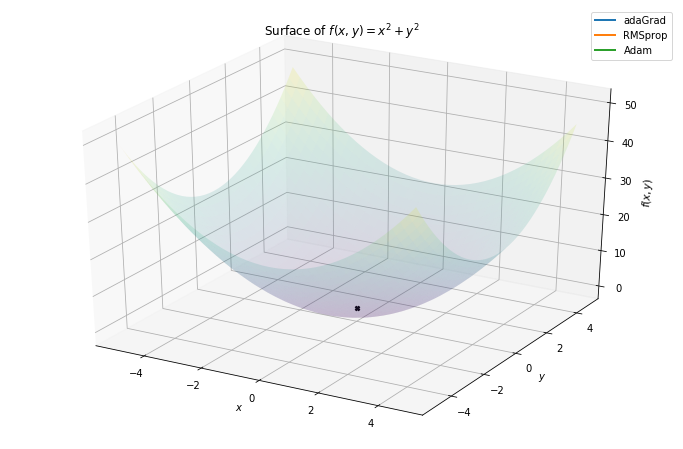

In [17]:
anim = Animation(adaGrad,RMSprop,Adam)(VECTOR)
HTML(anim)

# Additional Resources

https://gluon.mxnet.io/chapter06_optimization/optimization-intro.html

http://ruder.io/optimizing-gradient-descent/index.html

https://www.khanacademy.org/math/multivariable-calculus/

https://github.com/pytorch/pytorch/tree/master/torch/optim

https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

http://ruder.io/optimizing-gradient-descent/index.html#adadelta

# The END